# HW 2 - 1D Cellular Automata
Please submit the modified file as your completed homework. Name the file firstname_lastname-HW1.ipynb

As we discussed even these very abstract models can be used to simulate real biological systems. The excercises today are an attempt to get you to a place where you are representing a real system in a simulation for the first time.

Don't forget to comment your code!


## Excercise 1
Implement a 1 D cellular automata as was described in the lecture and demonstrate a rule-set configuration that displays complexity. In a comment justify why you think that particular configuration constitutes a "complex" result. 

Functions and expected outputs:

rules: Sets the rules for your universe as shown in class. Input=(left, home, right, config) where left, home and right are type int and config is an array. Output=Value from config depending on how you defined rules. Values for config should be either 0 or 1

generate: Generates a universe as discussed in class. Input=(unvierse, config) where universe is a Numpy array of only/both 0s and 1s and configs is the same as defined above. Output=newuniverse where newuniverse is a Numpy array.

num_2_binary_arr(num): Input=integer number, Output=Numpy array of 1s and 0s AKA the binary representation of the integer. Use this to generate config. 

Show complexity by running and displaying multiple generations of your universe as shown in the image below

Text(0.5, 0, 'Position in Universe')

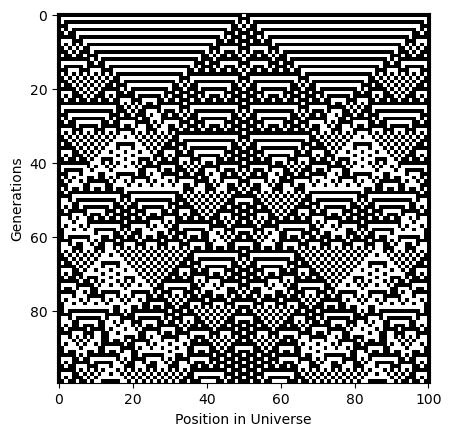

In [76]:
#Your code here
import numpy as np

import matplotlib.pyplot as plt 

def rules(left,home,right,config):
    if (left==0) & (home==0) & (right==0):
        return config[0]
    if (left==0) & (home==0) & (right==1):
        return config[1]
    if (left==0) & (home==1) & (right==0):
        return config[2]
    if (left==0) & (home==1) & (right==1):
        return config[3]
    if (left==1) & (home==0) & (right==0):
        return config[4]
    if (left==1) & (home==0) & (right==1):
        return config[5]
    if (left==1) & (home==1) & (right==0):
        return config[6]
    if (left==1) & (home==1) & (right==1):
        return config[7]

def generate(universe, config):
    newuniverse = np.zeros((1, universe.size))
    # Build a loop that scans through the universe and applies the rules
    
    for i in np.arange(universe.size):
        
        # Deal with boundary conditions by ignoring
        # Specifically, identify when indices are not left or right most entries into the array
        if (i!=0)&(i!=universe.size-1): #Minus 1 because of fence posting
            
            left = universe[0,i-1] # Indexes the left podition relstively 
            home = universe[0, i]
            right = universe[0,i+1]
            #Save the state that was jsut calculated for the ith position into newuniverse structure
            newuniverse[0,i] = rules(left, home, right, config)
    return newuniverse

def num2binArray(num):
    binstr = np.binary_repr(num,width=8)
    binArray = np.empty(0)
    
    for i in binstr:
        binArray = np.append(binArray, int(i))
    return np.flip(binArray)

# Time to put all these functions together for  simulation
# Time in number of generations
import matplotlib.pyplot as plt
t = 100
#Use our num2binArray function to generate a config
config=num2binArray(105)
#Define intial conditions of universe and size
universe = np.zeros((1,101))
universe[0,50] = 1 #introduce single inhomgeneity

# Create a variable in which to store generations 
statememory = np.zeros((t,universe.size))

for i in range(t):
    statememory[i,:] = universe
    newuniverse=generate(universe,config)
    universe = newuniverse
    
# Create a visualization
plt.imshow(statememory,cmap='gray')
plt.ylabel("Generations")
plt.xlabel("Position in Universe")

In our example, with slight modifications upon the rules and binary configuration from the number 105, a complex output is outputted. At a first glance, there seems to be a pattern of triangles and symmetry, but as the model progresses, the triangles become more distorted showcasing its increasing complexity.

## Excercise 2

Alter the `generate` function so that you have "wrap around" boundary conditions. Meaning that the left most cell uses the right most cell as its 'left' and the right most cell uses the left most cell as its 'right'. Call this function `generate_alt` that takes the same inputs as `generate` but includes the wrap around conditions.

Show an example of a configuration where the boundary conditions change the result and also one where they do not.

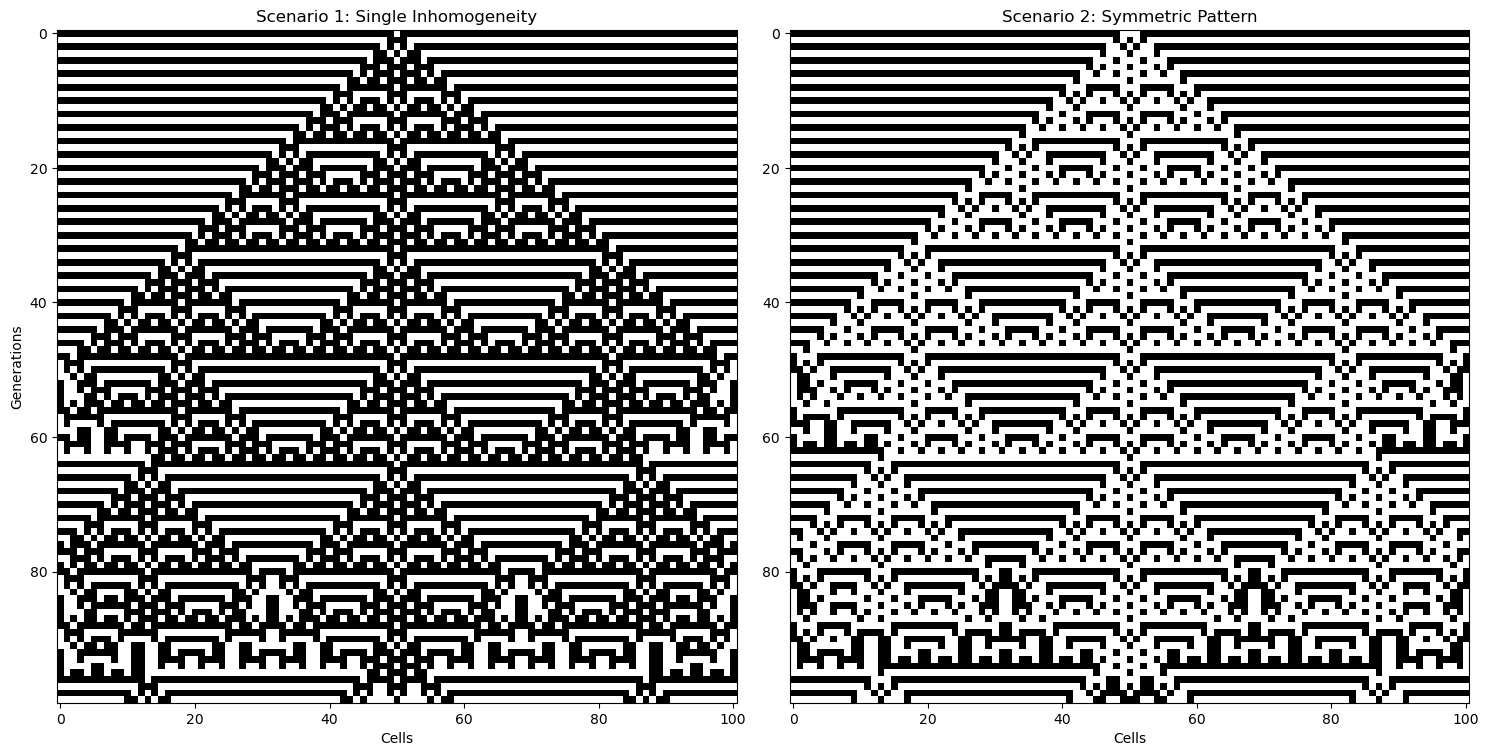

In [5]:
#Your code here. 
def generate_alt(universe, config):
    newuniverse = np.zeros((1, universe.size))
    for i in np.arange(universe.size):
        # Handling wrap-around boundary conditions
        left = universe[0, i - 1] if i != 0 else universe[0, -1]
        home = universe[0, i]
        right = universe[0, i + 1] if i != universe.size - 1 else universe[0, 0]
        newuniverse[0, i] = rules(left, home, right, config)
    return newuniverse

# Setting up the configurations for two scenarios
# Using Rule 105 again for consistency
config = num2binArray(105)

# Scenario 1: Universe where boundary conditions might change the result
universe1 = np.zeros((1, 101))
universe1[0, 50] = 1  # Single inhomogeneity

# Scenario 2: Universe where boundary conditions might not change the result (symmetric)
universe2 = np.zeros((1, 101))
universe2[0, 49:52] = 1  # Symmetric pattern

# Number of generations
t = 100

# Storing generations for both scenarios
statememory1 = np.zeros((t, universe1.size))
statememory2 = np.zeros((t, universe2.size))

for i in range(t):
    statememory1[i, :] = universe1
    statememory2[i, :] = universe2
    universe1 = generate_alt(universe1, config)
    universe2 = generate_alt(universe2, config)

# Visualization for both scenarios
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(statememory1, cmap='gray')
plt.title("Scenario 1: Single Inhomogeneity")
plt.ylabel("Generations")
plt.xlabel("Cells")

plt.subplot(1, 2, 2)
plt.imshow(statememory2, cmap='gray')
plt.title("Scenario 2: Symmetric Pattern")
plt.xlabel("Cells")

plt.tight_layout()
plt.show()

#Expected output of generate_alt using config=105 as a binary number.

## Excercise 3

With wrap-around boundary conditions simulate rule 30 on a universe of width 1001 for 1000 generations. What will the central cell (500th) be on the 1001 generation? Comment on if there is any way that you could predict what this cell would be without running the simulation. 

In [75]:
# Setting up the configuration for Rule 30
config_rule_30 = num2binArray(30)

# Universe parameters for Rule 30 simulation
universe_width_30 = 1001
universe_rule_30 = np.zeros((1, universe_width_30))
universe_rule_30[0, universe_width_30 // 2] = 1  # Starting with a single cell in the center

# Number of generations for Rule 30 simulation
generations_30 = 1000

# Running the simulation with wrap-around boundary conditions
for i in range(generations_30):
    universe_rule_30 = generate_alt(universe_rule_30, config_rule_30)

# State of the central cell in the 1001st generation
central_cell_state_30 = universe_rule_30[0, universe_width_30 // 2]
print(central_cell_state_30)

comments = 'There is no way to predict what the cell would be without running the simulation because rule 30 is meant to become more random and disordered overtime. It would be impossible to predict the outcome.'
print(comments)

0.0
There is no way to predict what the cell would be without running the simulation because rule 30 is meant to become more random and disordered overtime. It would be impossible to predict the outcome.


## Excercise 4
Predator-prey dynamics can be modeled using CA. 
Make a model of predator-prey interactions with 3 states. 0 is empty space, 1 is rabbits, and 2 is foxes. 

Hint: With three states there should 3^3 = 27 neighborhoods. I would advise you to HAND WRITE all the scenarios first on paper before beginging to program

Design your rule-set such that paired rabbits multiply, foxes next to rabbits eat the rabbits and become more foxes, isolated rabbits live, isolated foxes die. Run the simulation for 100 timpoints over a universe that is length 100 starting with random initial conditions. Who wins? 

For prettier simulations try any of the following colormaps in cmap argument: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

For example:


`plt.imshow(stateMemory, cmap = 'magma')`


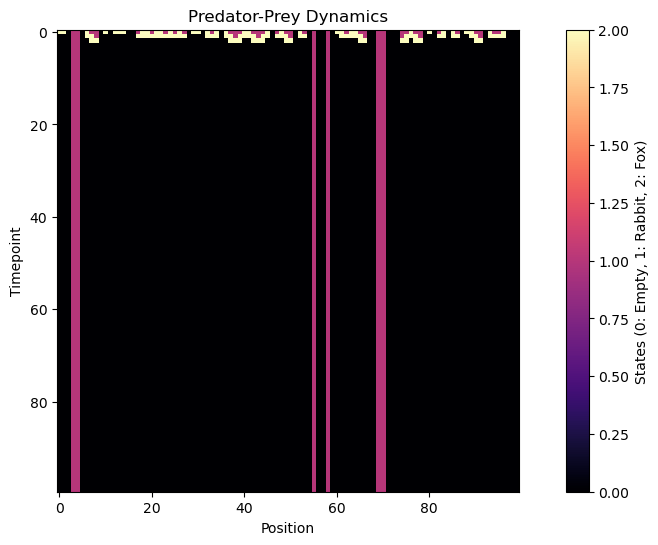

Neither foxes nor rabbits are more likely to win in this scenario with the rules set. Rule set and visualization for rabbit win is below.


In [64]:
def pred_prey_rules(left, home, right):
    
    # Rabbit rules
    if home == 1:
        # Rabbits multiply if they are paired and no fox is next to them
        if (left == 1 or right == 1) and not (left == 2 or right == 2):
            return 1
        # Rabbits get eaten by foxes
        elif left == 2 or right == 2:
            return 2
        # Isolated rabbits live
        else:
            return 1
    # Fox rules
    elif home == 2:
        # Foxes next to rabbits eat and become more foxes
        if left == 1 or right == 1:
            return 2
        # Isolated foxes die
        else:
            return 0
    # Empty space rules
    else:
        # Space remains empty if two rabbits/foxes are next to it
        if left == 1 or 2 and right == 1 or 2:
            return 0
        # Remains empty otherwise
        else:
            return 0

def pred_prey_generate(universe):
    new_universe = np.zeros_like(universe)
    for i in range(len(universe)):
        # Wrap-around boundary conditions
        left = universe[i - 1] if i != 0 else universe[-1]
        home = universe[i]
        right = universe[i + 1] if i != len(universe) - 1 else universe[0]
        new_universe[i] = pred_prey_rules(left, home, right)
    return new_universe

# Initialize the universe
universe_length = 100
universe = np.random.choice([0, 1, 2], size=universe_length)

# Run the simulation
state_memory = np.zeros((100, universe_length))
for t in range(100):
    state_memory[t] = universe
    universe = pred_prey_generate(universe)

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(state_memory, cmap='magma')
plt.colorbar(label='States (0: Empty, 1: Rabbit, 2: Fox)')
plt.title("Predator-Prey Dynamics")
plt.xlabel("Position")
plt.ylabel("Timepoint")
plt.show()

comments = 'Neither foxes nor rabbits are more likely to win in this scenario with the rules set. Rule set and visualization for rabbit win is below.'
print(comments)

Functions you will need to write for this problem are the following:

pred_pray_rules(left, home, right) which takes in left, home and right as ints ranging from 0-2, and returns either 0, 1 or 2 depending on the conditions describe by the fox rabbit rules above.

pred_pray_generate(universe): Input is a Numpy array containing ints ranging from 0-2 and output=newuniverse where new universe is a Numpy array containing ints ranging from 0-2 (Remember that the new universe should be generated using pred_pray_rules).

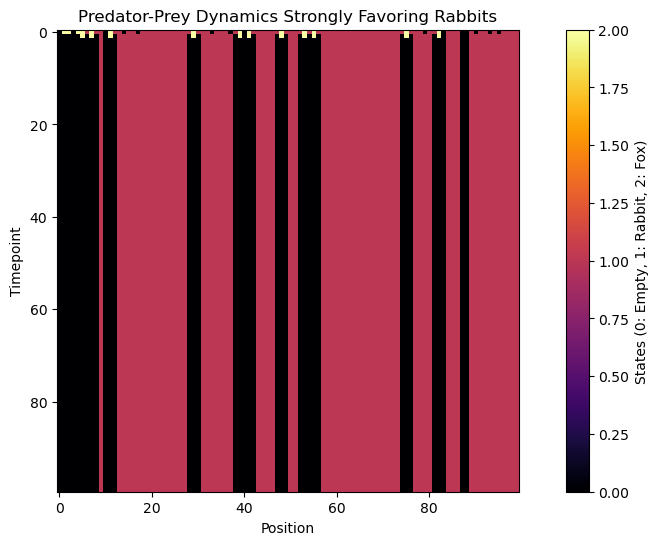

Rule set changed so that empty spaces with no fox present are filled in by rabbits. This creates a scenario where rabbits dominate the dynamic.


In [66]:
def pred_prey_rules_strongly_favor_rabbits(left, home, right):
   
    if home == 1:  # Rabbit rules
        if left == 2 or right == 2:
            return 0  
        elif left == 1 or right == 1:
            return 1  # Rabbits reproduce more frequently
        else:
            return 1  # Isolated rabbits live
    elif home == 2:  # Fox rules
        if left == 1 or right == 1:
            return 2  # Foxes stay if rabbits are nearby but less likely to multiply
        else:
            return 0  # Isolated foxes die
    else:  # Empty space rules
        if left == 1 and right == 1:
            return 1  # Higher chance of empty space becoming a rabbit
        else:
            return 0  # Otherwise, it stays empty

def pred_prey_generate_strongly_favor_rabbits(universe):
    new_universe = np.zeros_like(universe)
    for i in range(len(universe)):
        left = universe[i - 1] if i != 0 else universe[-1]
        home = universe[i]
        right = universe[i + 1] if i != len(universe) - 1 else universe[0]
        new_universe[i] = pred_prey_rules_strongly_favor_rabbits(left, home, right)
    return new_universe

# Initialize a universe with significantly more rabbits
universe_strongly_rabbit_favored = np.random.choice([0, 1, 2], size=universe_length, p=[0.2, 0.7, 0.1])

# Run the simulation with the strongly rabbit-favored universe
state_memory_strongly_rabbit_favored = np.zeros((100, universe_length))
for t in range(100):
    state_memory_strongly_rabbit_favored[t] = universe_strongly_rabbit_favored
    universe_strongly_rabbit_favored = pred_prey_generate_strongly_favor_rabbits(universe_strongly_rabbit_favored)

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(state_memory_strongly_rabbit_favored, cmap='inferno')
plt.colorbar(label='States (0: Empty, 1: Rabbit, 2: Fox)')
plt.title("Predator-Prey Dynamics Strongly Favoring Rabbits")
plt.xlabel("Position")
plt.ylabel("Timepoint")
plt.show()

comments = 'Rule set changed so that empty spaces with no fox present are filled in by rabbits. This creates a scenario where rabbits dominate the dynamic.'
print(comments)

With your conditions, do bunnies or foxes win? Can you come up with a universe where bunnies win and one where foxes win (for fun, just need one example of your code working for credit)

## Excercise 5

Run the predator prey model except make the rule predation of rabbits by foxes and multiplication of rabbits and foxes a probabilistic event. E.g. Only 20% of foxes interacting with rabbits are successful. Can you find probabilities where foxes and rabbits appear to coexist? Please comment on under what conditions having probabilistic rules would be more appropriate than deterministic rules?

Functions you should make:

pred_pray_rules_alt(left, home, right): Input and output is same as in Excercise 4 but the new rules should include the probability of a fox failing to interact with a rabbit.

pred_pray_generate_alt(universe): Input is a Numpy array containing ints ranging from 0-2 and output=newuniverse where newuniverse is generated using pred_pray_rules_alt.

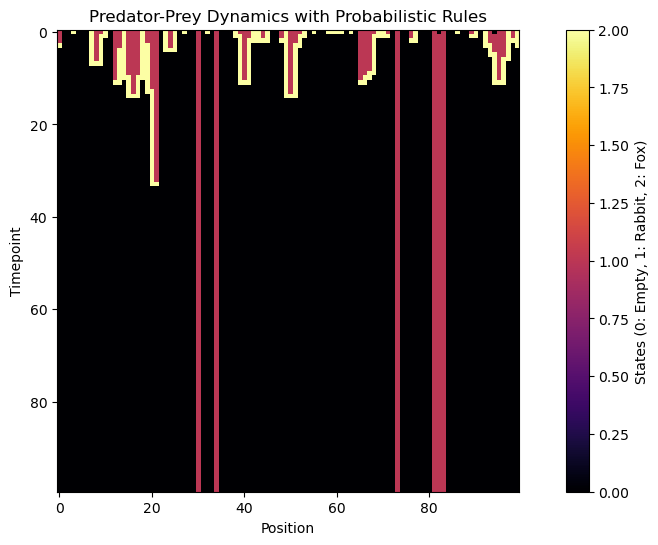

Comment 1: There are no probabilities where foxes and rabbits coexist overtime. This is because the nature of this dynamic is left up to probability which is imprecise and is hard to predict.
Comment 2: Conditions, such as the one presented, would be ideal for probalistic rules rather than deterministic because real predator prey dynamics are left up to chance and are inherently random rather than precise calculated events.


In [72]:
import random

def pred_prey_rules_alt(left, home, right):
   
    predation_success_rate = 0.2  # Probability of fox successfully eating a rabbit
    reproduction_rate = 0.7       # Probability of successful reproduction

    if home == 1:  # Rabbit rules
        if (left == 2 or right == 2) and random.random() < predation_success_rate:
            return 2  # Rabbits get eaten by foxes with a certain probability
        elif (left == 1 or right == 1) and random.random() < reproduction_rate:
            return 1  # Rabbits reproduce with a certain probability
        else:
            return 1  # Isolated rabbits live

    elif home == 2:  # Fox rules
        if left == 1 or right == 1:
            return 2  # Foxes stay if rabbits are nearby
        else:
            return 0  # Isolated foxes die

    else:  # Empty space rules
        if left == 1 and right == 1 and random.random() < reproduction_rate:
            return 1  # Space becomes a rabbit if two rabbits are next to it
        else:
            return 0  # Otherwise, it stays empty

def pred_prey_generate_alt(universe):
    new_universe = np.zeros_like(universe)
    for i in range(len(universe)):
        # Wrap-around boundary conditions
        left = universe[i - 1] if i != 0 else universe[-1]
        home = universe[i]
        right = universe[i + 1] if i != len(universe) - 1 else universe[0]
        new_universe[i] = pred_prey_rules_alt(left, home, right)
    return new_universe

# Initialize the universe
universe_length = 100
universe = np.random.choice([0, 1, 2], size=universe_length)

# Run the simulation
state_memory = np.zeros((100, universe_length))
for t in range(100):
    state_memory[t] = universe
    universe = pred_prey_generate_alt(universe)

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(state_memory, cmap='inferno')
plt.colorbar(label='States (0: Empty, 1: Rabbit, 2: Fox)')
plt.title("Predator-Prey Dynamics with Probabilistic Rules")
plt.xlabel("Position")
plt.ylabel("Timepoint")
plt.show()

comments = 'Comment 1: There are no probabilities where foxes and rabbits coexist overtime. This is because the nature of this dynamic is left up to probability which is imprecise and is hard to predict.'
comments_2 = 'Comment 2: Conditions, such as the one presented, would be ideal for probalistic rules rather than deterministic because real predator prey dynamics are left up to chance and are inherently random rather than precise calculated events.'
print(comments)
print(comments_2)


## Excercise 6 (Not optional for graduate students)

Simulate one of the following:
* Use a 1D cellular automaton to model the growth of a bacterial colony, taking into account factors such as cell division, death, and mutation.

* Use a 1D cellular automaton to simulate the spread of a virus in a population, considering factors such as infection rates, recovery rates, and mortality rates.

* Use a 1D cellular automaton to model a simple ecosystem, in which different species interact and compete for resources. Find parameters where cooperation emerges.

Functions you make here are up to you, but you must provide the logic for your rule set for credit.


In [5]:
#Code here

### Who did you work with:
* name 1
* name 2
* name 3